<a href="https://colab.research.google.com/github/riskadchrn/finalexamp-kelaswork/blob/main/case_4_muffin_chihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from glob import glob
import json
import os
import tensorflow as tf

num_classes = 2
epoch = 30

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#load dataset
data_dir = '/content/drive/My Drive/MuffinChihuahua'
train_dir = '/content/drive/My Drive/MuffinChihuahua/train'
test_dir = '/content/drive/My Drive/MuffinChihuahua/test'

In [ ]:
num_classes = len(os.listdir('/content/drive/My Drive/MuffinChihuahua/train'))
print(num_classes)



2


In [ ]:
# pastikan folder train ada
if os.path.exists(train_dir):
  print("train_dir ready")
else:
  print("train_dir not ready")


#dapatkan daftar nama file di train_dir
filenames = os.listdir(train_dir)

#print filenames
print("Filenames in", train_dir, ":")
for filenames in filenames:
  print(filenames)

train_dir ready
Filenames in /content/drive/My Drive/MuffinChihuahua/train :
muffin
chihuahua


In [ ]:
# pastikan folder test ada
if os.path.exists(test_dir):
  print("test_dir ready")
else:
  print("test_dir not ready")

#dapatkan namafile di test_dir
filenames = os.listdir(test_dir)

#print filenames
print("Filenames in", test_dir, ":")
for filenames in filenames:
  print(filenames)

test_dir ready
Filenames in /content/drive/My Drive/MuffinChihuahua/test :
muffin
chihuahua


In [ ]:
# Pra-pemrosesan data
#normalisasi value menjadi rentang 0 hingga 1
#validasi data adalah 20% dari data train
train_scale = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_scale = ImageDataGenerator(rescale=1./255)

In [ ]:
#split data
#directory path train data
train_data = train_scale.flow_from_directory(
    '/content/drive/My Drive/MuffinChihuahua/train',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='binary'
)
#validasi data 0.2 atau 20% dari data train
val_data = train_scale.flow_from_directory(
    '/content/drive/My Drive/MuffinChihuahua/train',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

#directory path test data
test_data = test_scale.flow_from_directory(
    '/content/drive/My Drive/MuffinChihuahua/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4432 images belonging to 2 classes.
Found 1107 images belonging to 2 classes.
Found 1514 images belonging to 2 classes.


In [ ]:
#Callbacks (Early Stopping+simpan model terbaik)

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

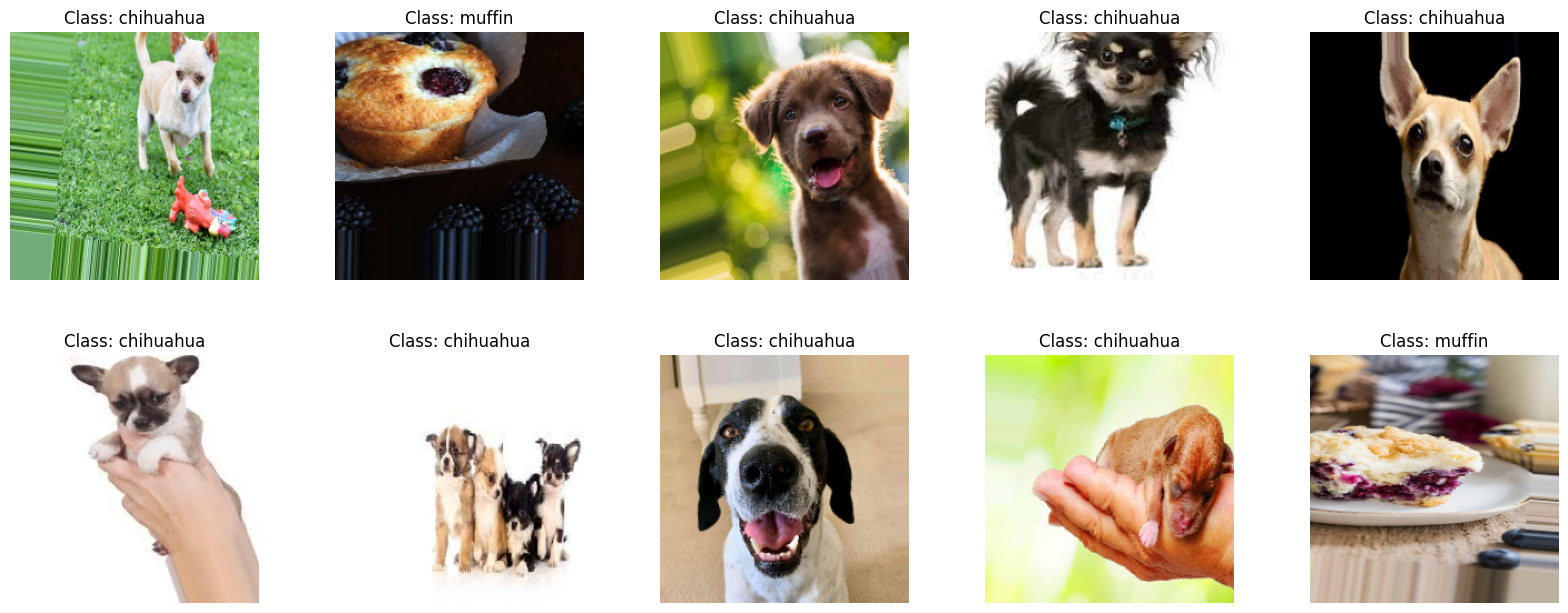

In [ ]:
#plotting image

labels = ['chihuahua', 'muffin']

samples = train_data.__next__()
images = samples[0] #data image diambil dari data train
target = samples[1]

plt.figure(figsize = (20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.subplots_adjust(hspace=0.3,wspace=0.3)
  plt.imshow(images[i])
  plt.title(f"Class: {labels[int(target[i])]}")
  plt.axis('off')

In [ ]:
train_data, val_data

(<keras.src.legacy.preprocessing.image.DirectoryIterator at 0x7fe9abbf57d0>,
 <keras.src.legacy.preprocessing.image.DirectoryIterator at 0x7fea45e2d990>)

In [ ]:
#CNN MODELLING DEFINITION

cnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

In [ ]:
#Compile The Model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Train Model (Max 30 Epochs)

history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5652 - loss: 1.3102
Epoch 1: val_loss improved from inf to 0.60937, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 1254s 9s/step - accuracy: 0.5654 - loss: 1.3066 - val_accuracy: 0.7570 - val_loss: 0.6094
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7373 - loss: 0.5477
Epoch 2: val_loss improved from 0.60937 to 0.42213, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.7375 - loss: 0.5474 - val_accuracy: 0.8085 - val_loss: 0.4221
Epoch 3/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7996 - loss: 0.4546
Epoch 3: val_loss improved from 0.42213 to 0.33111, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 395s 3s/step - accuracy: 0.7997 - loss: 0.4544 - val_accuracy: 0.8744 - val_loss: 0.3311
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8370 - loss: 0.3913
Epoch 4: val_loss improved from 0.33111 to 0.32192, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 404s 3s/step - accuracy: 0.8370 - loss: 0.3914 - val_accuracy: 0.8862 - val_loss: 0.3219
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8436 - loss: 0.3649
Epoch 5: val_loss improved from 0.32192 to 0.29565, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.8436 - loss: 0.3650 - val_accuracy: 0.8925 - val_loss: 0.2957
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8655 - loss: 0.3480
Epoch 6: val_loss did not improve from 0.29565
139/139 ━━━━━━━━━━━━━━━━━━━━ 409s 3s/step - accuracy: 0.8654 - loss: 0.3482 - val_accuracy: 0.8446 - val_loss: 0.3594
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8564 - loss: 0.3517
Epoch 7: val_loss improved from 0.29565 to 0.25982, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.8565 - loss: 0.3517 - val_accuracy: 0.8997 - val_loss: 0.2598
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8605 - loss: 0.3467
Epoch 8: val_loss did not improve from 0.25982
139/139 ━━━━━━━━━━━━━━━━━━━━ 432s 3s/step - accuracy: 0.8605 - loss: 0.3467 - val_accuracy: 0.8880 - val_loss: 0.3061
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8552 - loss: 0.3503
Epoch 9: val_loss did not improve from 0.25982
139/139 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.8553 - loss: 0.3503 - val_accuracy: 0.8835 - val_loss: 0.3045
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8729 - loss: 0.3266
Epoch 10: val_loss did not improve from 0.25982
139/139 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.8729 - loss: 0.3266 - val_accuracy: 0.8934 - val_loss: 0.2718
Epoch 11/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8882 - loss: 0.2950
Epoch 11: val_loss improved from 0.25982 to 

139/139 ━━━━━━━━━━━━━━━━━━━━ 395s 3s/step - accuracy: 0.8882 - loss: 0.2950 - val_accuracy: 0.9286 - val_loss: 0.2132
Epoch 12/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8745 - loss: 0.3084
Epoch 12: val_loss did not improve from 0.21316
139/139 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.8746 - loss: 0.3083 - val_accuracy: 0.9187 - val_loss: 0.2328
Epoch 13/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8796 - loss: 0.3066
Epoch 13: val_loss did not improve from 0.21316
139/139 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.8796 - loss: 0.3066 - val_accuracy: 0.9196 - val_loss: 0.2238
Epoch 14/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8917 - loss: 0.2789
Epoch 14: val_loss improved from 0.21316 to 0.18210, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 435s 3s/step - accuracy: 0.8918 - loss: 0.2788 - val_accuracy: 0.9386 - val_loss: 0.1821
Epoch 15/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8805 - loss: 0.2902
Epoch 15: val_loss did not improve from 0.18210
139/139 ━━━━━━━━━━━━━━━━━━━━ 390s 3s/step - accuracy: 0.8805 - loss: 0.2902 - val_accuracy: 0.9277 - val_loss: 0.2154
Epoch 16/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9042 - loss: 0.2615
Epoch 16: val_loss did not improve from 0.18210
139/139 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.9041 - loss: 0.2615 - val_accuracy: 0.9295 - val_loss: 0.2047
Epoch 17/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9084 - loss: 0.2494
Epoch 17: val_loss did not improve from 0.18210
139/139 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.9083 - loss: 0.2495 - val_accuracy: 0.8844 - val_loss: 0.2880
Epoch 18/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8807 - loss: 0.2861
Epoch 18: val_loss did not improve from 

139/139 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.9085 - loss: 0.2597 - val_accuracy: 0.9404 - val_loss: 0.1771
Epoch 20/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9014 - loss: 0.2566
Epoch 20: val_loss did not improve from 0.17712
139/139 ━━━━━━━━━━━━━━━━━━━━ 399s 3s/step - accuracy: 0.9014 - loss: 0.2567 - val_accuracy: 0.9295 - val_loss: 0.2000
Epoch 21/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9015 - loss: 0.2502
Epoch 21: val_loss did not improve from 0.17712
139/139 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.9015 - loss: 0.2502 - val_accuracy: 0.9277 - val_loss: 0.1971
Epoch 22/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8997 - loss: 0.2544
Epoch 22: val_loss did not improve from 0.17712
139/139 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - accuracy: 0.8997 - loss: 0.2544 - val_accuracy: 0.9097 - val_loss: 0.2381
Epoch 23/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8952 - loss: 0.2571
Epoch 23: val_loss did not improve from 

139/139 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.9139 - loss: 0.2277 - val_accuracy: 0.9485 - val_loss: 0.1621
Epoch 25/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9078 - loss: 0.2399
Epoch 25: val_loss improved from 0.16211 to 0.15504, saving model to best_model.h5


139/139 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - accuracy: 0.9078 - loss: 0.2399 - val_accuracy: 0.9494 - val_loss: 0.1550
Epoch 26/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9178 - loss: 0.2221
Epoch 26: val_loss did not improve from 0.15504
139/139 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.9178 - loss: 0.2222 - val_accuracy: 0.9133 - val_loss: 0.2416
Epoch 27/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9088 - loss: 0.2304
Epoch 27: val_loss did not improve from 0.15504
139/139 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.9087 - loss: 0.2304 - val_accuracy: 0.9431 - val_loss: 0.1570
Epoch 28/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9015 - loss: 0.2361
Epoch 28: val_loss did not improve from 0.15504
139/139 ━━━━━━━━━━━━━━━━━━━━ 388s 3s/step - accuracy: 0.9016 - loss: 0.2362 - val_accuracy: 0.9359 - val_loss: 0.1921
Epoch 29/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9101 - loss: 0.2362
Epoch 29: val_loss improved from 0.15504

139/139 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.9101 - loss: 0.2363 - val_accuracy: 0.9440 - val_loss: 0.1448
Epoch 30/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9145 - loss: 0.2276
Epoch 30: val_loss did not improve from 0.14477
139/139 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.9145 - loss: 0.2276 - val_accuracy: 0.9413 - val_loss: 0.1635


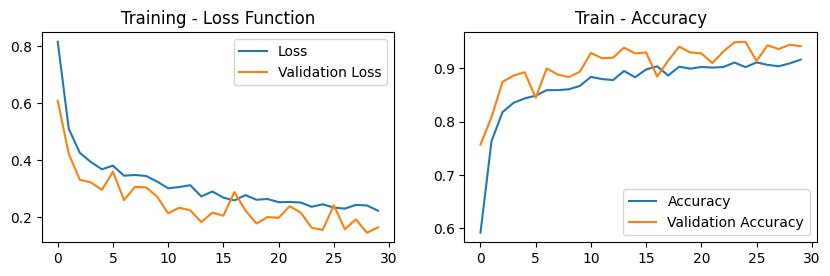

In [ ]:
#Plot Graph Training Accuracy vs Loss

plt.figure(figsize=(10,6))


plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')
plt.show()
plt.show()


1. Loss Function.

- Validation loss lebih rendah dibanding training loss → ini menunjukkan model tidak overfitting, bahkan generalisasi ke data baru sangat baik.
- Di akhir training, loss keduanya mendekati ~0.2, menandakan model mempelajari pola dengan baik.

2. Accuracy (Kanan)

- Validation accuracy sedikit lebih tinggi dari training accuracy → ini umum terjadi saat augmentasi membuat data training lebih sulit.
- Akurasi stabil di 90–95%, menunjukkan performa model konsisten dan tidak mengalami penurunan (tidak overfitting).


In [ ]:
score = cnn_model.evaluate(test_data,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2205
Test Accuracy : 0.9221


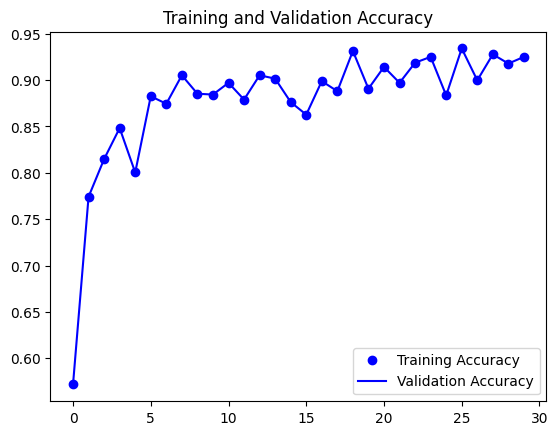

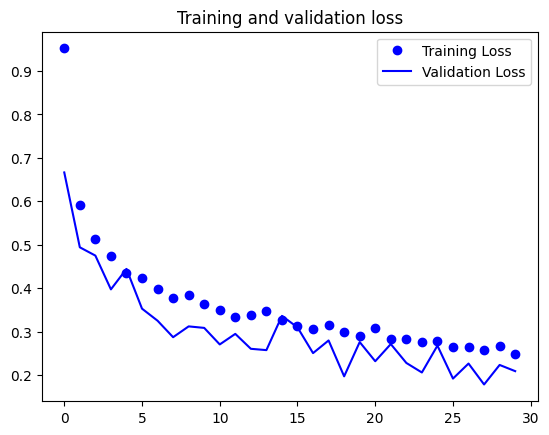

In [ ]:
#VALIDATION

import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['val_accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Terlihat dalam garfik, model CNN berada dalam kondisi ideal, karena:
- tidak overfitting. Grafik Training dan validation hampir mirip sepanjang training.
- Validation loss dan accuracy lebih bagus di beberapa epoch
- Model stabil, tidak ada noise
- Model terlatih optimal dengan 30 epoch


IMAGE PREDICTION

In [ ]:
from tensorflow.keras.preprocessing import image
def predict_chihuahua_muffin(image_path, model):
  # Load the image
  test_image = image.load_img(image_path, target_size=(224, 224))

  # Preprocessing the image (assumsing model expects specific prprocessing)
  test_image = image.img_to_array(test_image)
  test_image = test_image / 255.0
  test_image = np.expand_dims(test_image, axis=0)

  # make prediction
  prediction = model.predict(test_image)[0][0]

  # Assumsing binary classification (chihuahua/muffin) and categorical output:

  predicted_class = 'muffin' if prediction >= 0.5 else 'chihuahua'

  #return the predicted class
  return predicted_class

In [ ]:
# AUGMENTASI
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    fill_mode='nearest'
)

TESTING

In [ ]:
print(train_data.class_indices)

{'chihuahua': 0, 'muffin': 1}


In [ ]:
image_path = "/content/drive/My Drive/MuffinChihuahua/test/chihuahua/img_0_22.jpg"
print("Using image path:", image_path)
predicted_class = predict_chihuahua_muffin(image_path, cnn_model)
print("Predicted class:", predicted_class)

Using image path: /content/drive/My Drive/MuffinChihuahua/test/chihuahua/img_0_22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: chihuahua


In [ ]:
image_path = "/content/drive/My Drive/MuffinChihuahua/test/muffin/img_0_0.jpg"
print("Using image path:", image_path)
predicted_class = predict_chihuahua_muffin(image_path, cnn_model)
print("Predicted class:", predicted_class)

Using image path: /content/drive/My Drive/MuffinChihuahua/test/muffin/img_0_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: muffin
